In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score


In [2]:
#loading dataset tp pandas Dataframe
dataset = pd.read_csv(r"C:\Users\Asus\Downloads\finalDataset.csv", encoding='utf-8')
print(dataset.head(10))

     sn                                      Nepali tweets  \
0   1.0  नेपालमा बस्नु नै राम्रो हो, यहाँ अवसरहरू कम छन...   
1   2.0  विदेश जानु मेरो सपना हो, नेपालमा भविष्य देख्दि...   
2   3.0  नेपाल छोडेर विदेश जाँदा परिवारबाट टाढा हुनुपर्...   
3   4.0       नेपालमा काम छैन, विदेश गएर पैसा कमाउनु पर्छ।   
4   5.0  यहाँको सुन्दरता र संस्कृति छोड्न मन लाग्दैन, न...   
5   6.0  विदेशमा गएर जिन्दगी बनाउन सकिन्छ, नेपालमा केही...   
6   7.0  नेपालमा समस्या धेरै छन् तर यो मेरो देश हो, छोड...   
7   8.0  विदेशको कमाइले परिवार पाल्न सजिलो हुन्छ, जानैप...   
8   9.0  नेपालमै बसेर केही गर्न सकिन्छ, विदेश जानु आवश्...   
9  10.0  नेपालमा अवसर छैन, विदेश गएर पढ्न र कमाउन चाहन्छु।   

                                          Translated  polarity  
0  Staying in Nepal is better, there are fewer op...       0.0  
1  Going abroad is my dream, I don’t see a future...       1.0  
2  Leaving Nepal to go abroad means being far fro...       0.0  
3  There’s no work in Nepal, I need to go abroad ...     

In [3]:
#Step 1: Lowercase Conversion
def convert_to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return ""

In [4]:
import string
print(string.punctuation)
# Remove Punctuation
def remove_punctuation(text):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)
#Tokenization
def tokenize_text(text):
    return word_tokenize(text)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in english_stopwords]
print(stopwords.words('english'))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# joining tokens back
def join_tokens(tokens):
    return " ".join(tokens)

In [7]:
# preprocessing 
def preprocess_text(text):
    text = convert_to_lowercase(text)  
    text = remove_punctuation(text)  
    tokens = tokenize_text(text)  
    filtered_tokens = remove_stopwords(tokens)  
    cleaned_text = join_tokens(filtered_tokens) 
    return cleaned_text

In [8]:
#Apply preprocessing to the 'transalted' column
dataset['cleaned_text'] = dataset['Translated'].apply(preprocess_text)

In [9]:
# Save the preprocessed dataset to a new file
dataset.to_csv(r"C:\Users\Asus\Desktop\sa\sAnalysis2\nepaliCleaned.csv", index=False, encoding='utf-8')

In [10]:
print(dataset.head())

    sn                                      Nepali tweets  \
0  1.0  नेपालमा बस्नु नै राम्रो हो, यहाँ अवसरहरू कम छन...   
1  2.0  विदेश जानु मेरो सपना हो, नेपालमा भविष्य देख्दि...   
2  3.0  नेपाल छोडेर विदेश जाँदा परिवारबाट टाढा हुनुपर्...   
3  4.0       नेपालमा काम छैन, विदेश गएर पैसा कमाउनु पर्छ।   
4  5.0  यहाँको सुन्दरता र संस्कृति छोड्न मन लाग्दैन, न...   

                                          Translated  polarity  \
0  Staying in Nepal is better, there are fewer op...       0.0   
1  Going abroad is my dream, I don’t see a future...       1.0   
2  Leaving Nepal to go abroad means being far fro...       0.0   
3  There’s no work in Nepal, I need to go abroad ...       1.0   
4  I don’t want to leave the beauty and culture h...       0.0   

                                       cleaned_text  
0  staying nepal better fewer opportunities ’ peace  
1             going abroad dream ’ see future nepal  
2  leaving nepal go abroad means far family ’ right  
3            ’ work 

In [11]:
D = dataset['cleaned_text']  
P = dataset['polarity'] 

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training, validation, and test sets(temp will further split into train and validation)
X_temp, X_test, Y_temp, Y_test = train_test_split(D, P, test_size=0.15, random_state=1) 
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1765, random_state=1) 
                                                  #0.1765*85%~15% #random_state provides seed states(the data split will always be the same, even if you run the code multiple times)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
#initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
#training data
X_train_tfidf = vectorizer.fit_transform(X_train)
#validation data
X_val_tfidf = vectorizer.transform(X_val)
#test data
X_test_tfidf = vectorizer.transform(X_test)


In [15]:
# Replace NaN labels with a default class(MAY CONFLICT HAI CHECKOUT)
Y_train = np.nan_to_num(Y_train, nan=0)
Y_val = np.nan_to_num(Y_val, nan=0)
Y_test = np.nan_to_num(Y_test, nan=0)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
# initialize SVM model
svm_model = SVC(C=1.2, kernel='linear', gamma=0.7)
svm_model.fit(X_train_tfidf,Y_train)

Y_pred = svm_model.predict(X_test_tfidf)
Y_pred

# Train the model
svm_model.fit(X_train_tfidf, Y_train)

# Evaluate the model (on validation split)
Y_val_pred = svm_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display classification report for validation
print("\nValidation Classification Report:")
print(classification_report(Y_val, Y_val_pred))

# Evaluate the model (on test set)
Y_test_pred = svm_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report fortest
print("\nTest Classification Report:")
print(classification_report(Y_test, Y_test_pred))


Validation Accuracy: 0.7383

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.72        79
         1.0       0.67      0.86      0.75        70

    accuracy                           0.74       149
   macro avg       0.75      0.75      0.74       149
weighted avg       0.76      0.74      0.74       149

Test Accuracy: 0.7785

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76        71
         1.0       0.76      0.83      0.80        78

    accuracy                           0.78       149
   macro avg       0.78      0.78      0.78       149
weighted avg       0.78      0.78      0.78       149



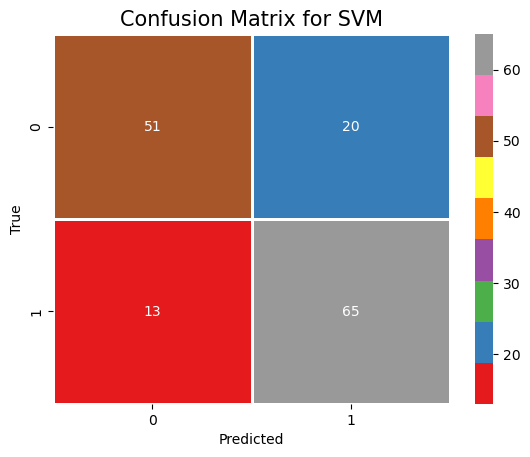

In [17]:
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix for SVM",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [29]:
#Usage Function to check
# new_tweets = ["A person who has just returned from abroad posts a photo of himself looking at the sky in a serious mood, wearing dark glasses, on Facebook, and those who see that photo lose sleep, sometimes thinking that he is stuck in nepal."]
# new_tweets_tfidf = vectorizer.transform(new_tweets)
# prediction = svm_model.predict(new_tweets_tfidf)
# print("positive" if prediction[0] == 1 else "negative")

In [30]:
#Usage Function to check
# new_tweets=["People skilled in speaking and talking find many job opportunities in Nepal every few years, earning much more than in countries like the US or UK. Nowadays, some are leaving behind high-paying jobs abroad to earn even more in Nepal."]
# new_tweets_tfidf = vectorizer.transform(new_tweets)
# prediction = svm_model.predict(new_tweets_tfidf)
# print("positive" if prediction[0] == 1 else "negative")

In [18]:
from sklearn.linear_model import LogisticRegression
# Train logistic regression model
LRmodel = LogisticRegression()
LRmodel.fit(X_train_tfidf, Y_train)

# Evaluate the model (on validation split)
Y_val_pred = LRmodel.predict(X_val_tfidf)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display classification report for validation
print("\nValidation Classification Report:")
print(classification_report(Y_val, Y_val_pred))

# Evaluate the model (on test set)
Y_test_pred = LRmodel.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report fortest
print("\nTest Classification Report:")
print(classification_report(Y_test, Y_test_pred))

Validation Accuracy: 0.7450

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.65      0.73        79
         1.0       0.68      0.86      0.76        70

    accuracy                           0.74       149
   macro avg       0.76      0.75      0.74       149
weighted avg       0.76      0.74      0.74       149

Test Accuracy: 0.8456

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83        71
         1.0       0.82      0.90      0.86        78

    accuracy                           0.85       149
   macro avg       0.85      0.84      0.84       149
weighted avg       0.85      0.85      0.84       149



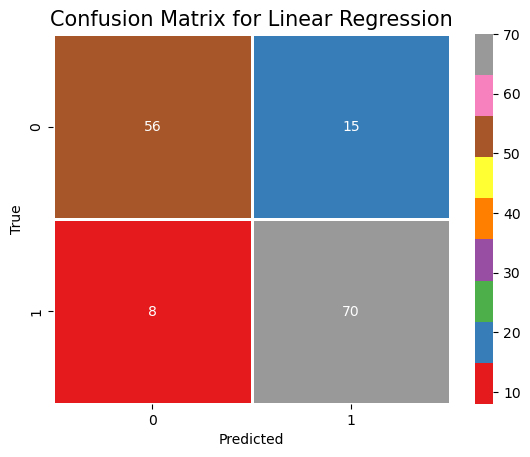

In [21]:
Y_pred = LRmodel.predict(X_test_tfidf)
Y_pred
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix for Linear Regression",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, Y_train)
Y_pred = nb_model.predict(X_test_tfidf)
# Evaluate the model (on validation split)
Y_val_pred = nb_model.predict(X_val_tfidf)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display classification report for validation
print("\nValidation Classification Report:")
print(classification_report(Y_val, Y_val_pred))

# Evaluate the model (on test set)
Y_test_pred = nb_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report fortest
print("\nTest Classification Report:")
print(classification_report(Y_test, Y_test_pred))

Validation Accuracy: 0.7315

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.63      0.71        79
         1.0       0.67      0.84      0.75        70

    accuracy                           0.73       149
   macro avg       0.75      0.74      0.73       149
weighted avg       0.75      0.73      0.73       149

Test Accuracy: 0.7987

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79        71
         1.0       0.82      0.79      0.81        78

    accuracy                           0.80       149
   macro avg       0.80      0.80      0.80       149
weighted avg       0.80      0.80      0.80       149



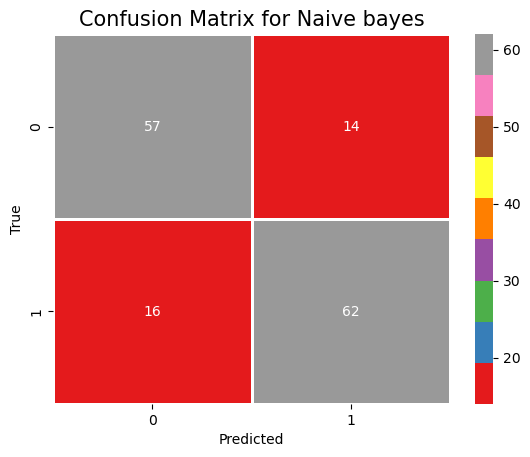

In [23]:
Y_pred = nb_model.predict(X_test_tfidf)
Y_pred
cm=confusion_matrix(Y_test,Y_pred)
class_label = [0, 1]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix for Naive bayes",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
# Define Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf.fit(X_train_tfidf, Y_train)
# Evaluate model accuracy
accuracy = rf.score(X_test_tfidf, Y_test)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8523


In [25]:
# Evaluate the model (on validation split)
Y_val_pred = rf.predict(X_val_tfidf)
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Display classification report for validation
print("\nValidation Classification Report:")
print(classification_report(Y_val, Y_val_pred))

# Evaluate the model (on test set)
Y_test_pred = rf.predict(X_test_tfidf)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report fortest
print("\nTest Classification Report:")
print(classification_report(Y_test, Y_test_pred))

Validation Accuracy: 0.7785

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79        79
         1.0       0.75      0.79      0.77        70

    accuracy                           0.78       149
   macro avg       0.78      0.78      0.78       149
weighted avg       0.78      0.78      0.78       149

Test Accuracy: 0.8523

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86        71
         1.0       0.92      0.78      0.85        78

    accuracy                           0.85       149
   macro avg       0.86      0.86      0.85       149
weighted avg       0.86      0.85      0.85       149



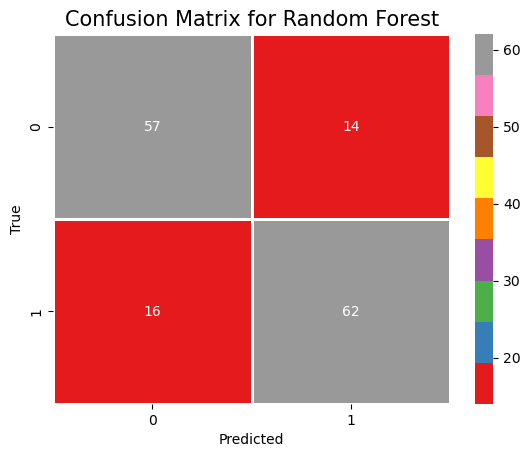

In [26]:
# Make predictions
y_pred = rf.predict(X_test_tfidf)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=rf.classes_)

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=2,fmt='d')
plt.title("Confusion Matrix for Random Forest",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

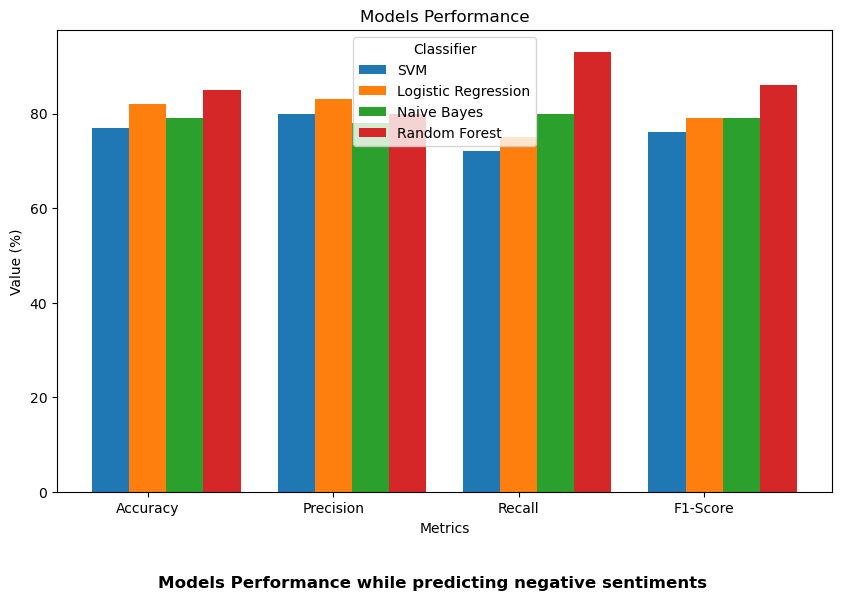

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define classifiers and metrics
classifiers = [ 'SVM', 'Logistic Regression', 'Naive Bayes', 'Random Forest']  # Adjust if needed
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define performance values (example values, adjust as needed)
values = {
    'SVM': [77, 80, 72, 76],
    'Logistic Regression': [82, 83, 75, 79],
    'Naive Bayes': [79, 78, 80, 79],
    'Random Forest': [85, 80, 93, 86]  # Example fourth classifier
}

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and x-axis positions
x = np.arange(len(metrics))
width = 0.2  

# Plot bars
for i, classifier in enumerate(classifiers):
    ax.bar(x + i * width - width, values[classifier], width, label=classifier)

# Labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (%)')
ax.set_title('Models Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend(title="Classifier")

# Add annotation for the figure
plt.figtext(0.5, -0.05, "Models Performance while predicting negative sentiments", ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.show()


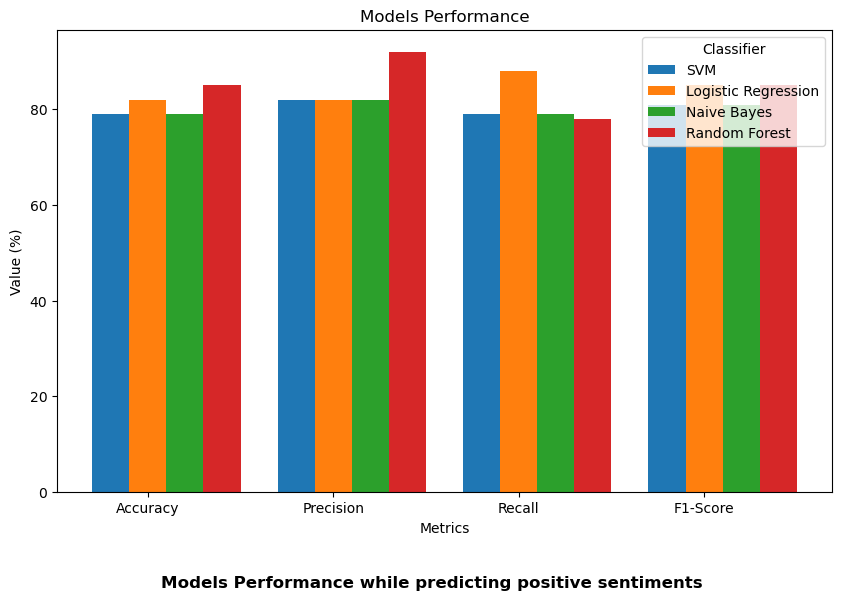

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define classifiers and metrics
classifiers = [ 'SVM', 'Logistic Regression', 'Naive Bayes', 'Random Forest']  # Adjust if needed
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Define performance values (example values, adjust as needed)
values = {
    'SVM': [ 79, 82, 79, 81],
    'Logistic Regression': [82, 82, 88, 85],
    'Naive Bayes': [79, 82, 79, 81],
    'Random Forest': [85, 92, 78, 85]  # Example fourth classifier
}

# Set up figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and x-axis positions
x = np.arange(len(metrics))
width = 0.2  

# Plot bars
for i, classifier in enumerate(classifiers):
    ax.bar(x + i * width - width, values[classifier], width, label=classifier)

# Labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (%)')
ax.set_title('Models Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

# Add legend
ax.legend(title="Classifier")

# Add annotation for the figure
plt.figtext(0.5, -0.05, "Models Performance while predicting positive sentiments", ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.show()
